In [9]:
import pandas as pd

In [10]:
df = pd.read_excel('dataset.xlsx')

In [11]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [12]:
import matplotlib.pyplot as plt

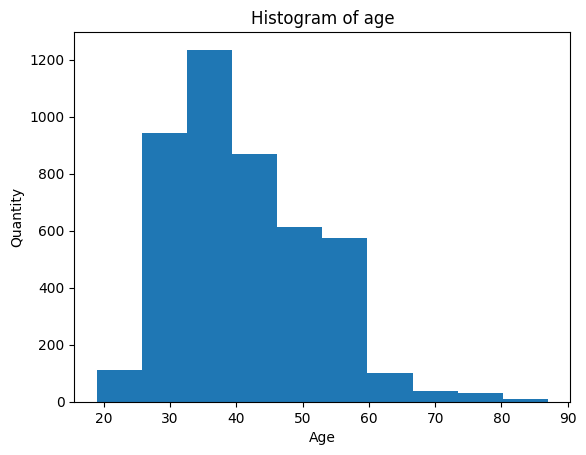

In [19]:
age = df['age']
plt.hist(age, bins=1)  # Adjust the number of bins as needed
plt.xlabel('Age')
plt.ylabel('Quantity')
plt.title('Histogram of age')
plt.show()

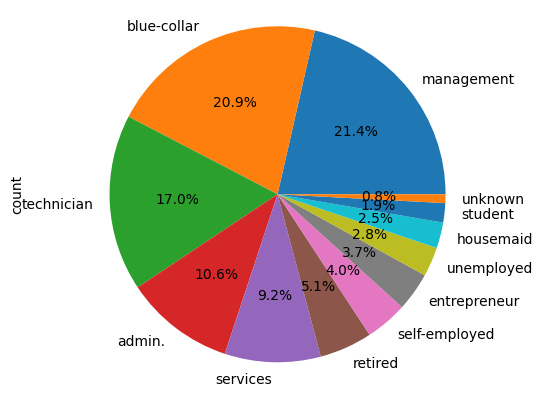

In [16]:
df['job'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

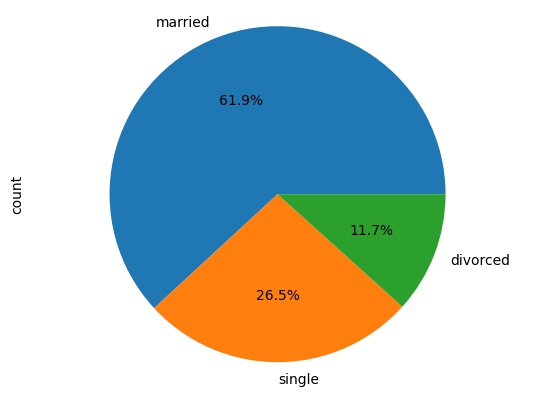

In [17]:
df['marital'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

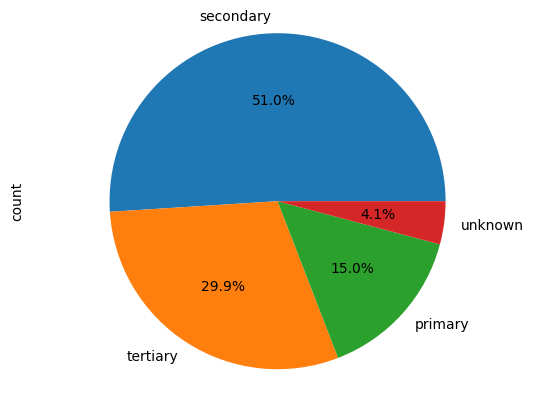

In [18]:
df['education'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

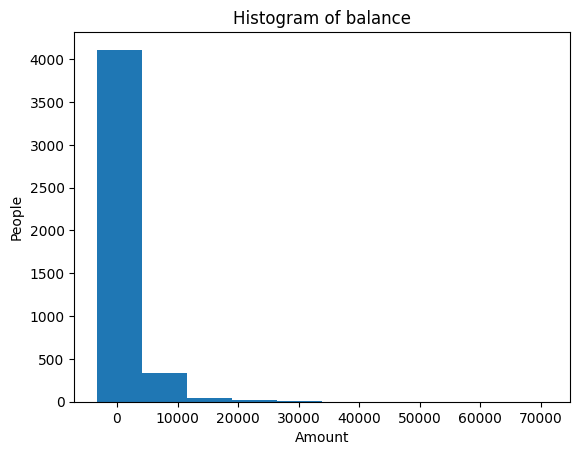

In [21]:
balance = df['balance']
plt.hist(balance, bins=10)  # Adjust the number of bins as needed
plt.xlabel('Amount')
plt.ylabel('People')
plt.title('Histogram of balance')
plt.show()